# Projeto 1: Análise de Vendas da Superstore

Este projeto realiza uma **Análise Exploratória de Dados (EDA)** em um dataset de vendas de uma grande loja, cobrindo o período de 2014 a 2017. O link para o dataset pode ser encontrado [aqui](https://www.kaggle.com/datasets/safavieh/superstore-dataset).

## Objetivos da Análise
O objetivo principal é extrair insights para responder às seguintes perguntas de negócio:
1. Qual a tendência de faturamento ao longo dos meses?
2. Quais categorias de produtos e estados são mais lucrativos?

## Ferramentas Utilizadas
- **Linguagem:** `Python`
- **Bibliotecas:**
  - `pandas` para manipulação dos dados.
  - `matplotlib` e `seaborn` para visualização.

A análise completa pode ser encontrada no Jupyter Notebook.

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [28]:
sns.set_style('whitegrid')

In [29]:
df = pd.read_csv('Sample - Superstore.csv', encoding='windows-1252')
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [31]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [32]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

## Pergunta 1: Qual o faturamento por mês ao longo do tempo

In [33]:
df['YearMonth'] = df['Order Date'].dt.to_period('M').astype(str)

In [34]:
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()

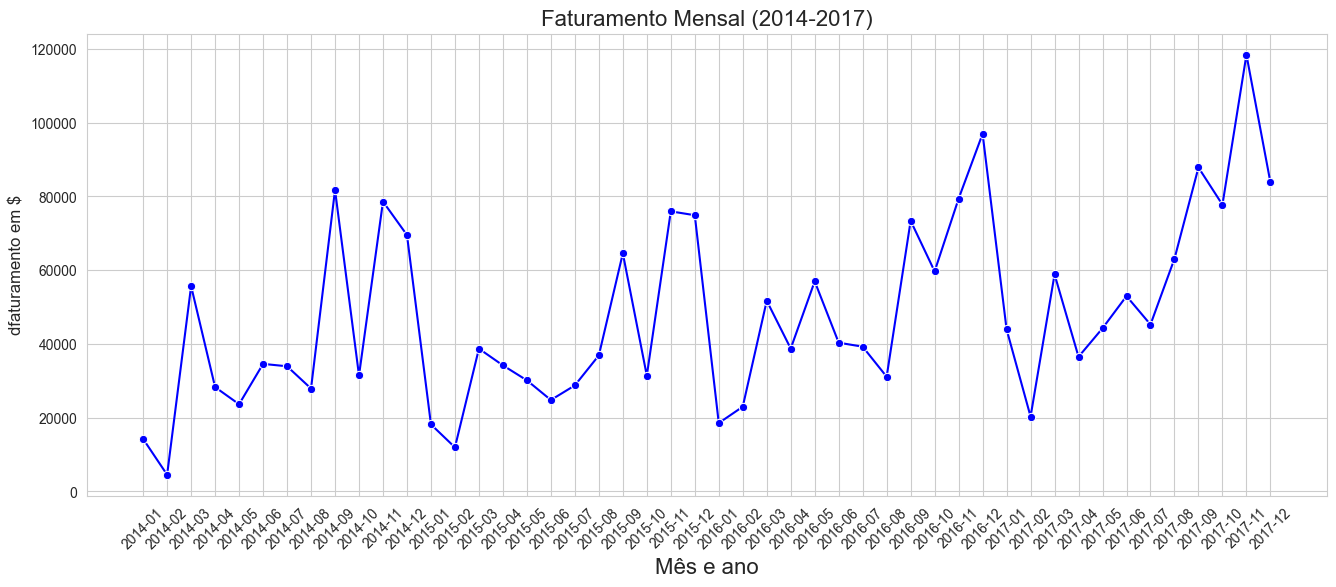

In [35]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='YearMonth', y='Sales', data=monthly_sales, marker='o', color='b')

plt.title('Faturamento Mensal (2014-2017)', fontsize=16)
plt.xlabel('Mês e ano', fontsize=16)
plt.ylabel('dfaturamento em $', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Pergunta 2: Qual categoria de produto gera mais receita



In [36]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).reset_index()

In [37]:
print(category_sales)

          Category        Sales
0       Technology  836154.0330
1        Furniture  741999.7953
2  Office Supplies  719047.0320


C:\Users\leona\AppData\Local\Temp\ipykernel_9804\2273645508.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Sales', data=category_sales, palette='viridis')


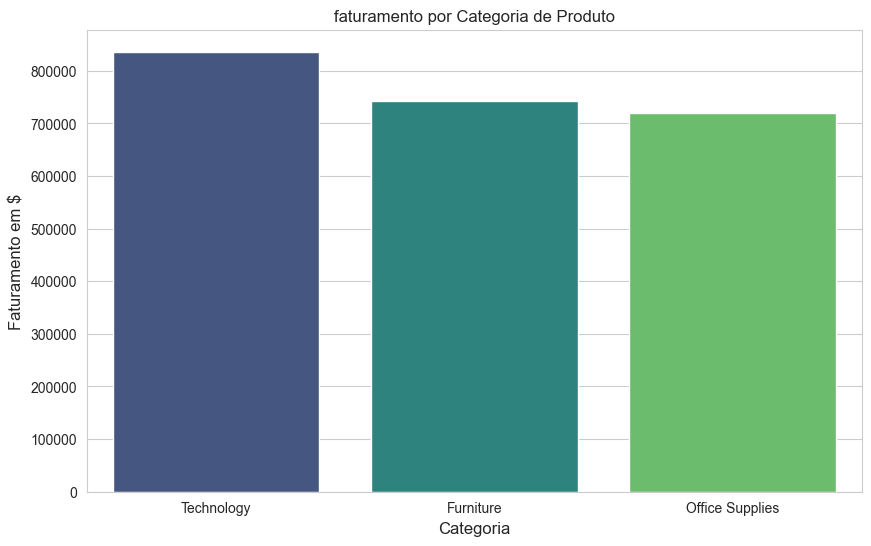

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=category_sales, palette='viridis')

plt.title('faturamento por Categoria de Produto', fontsize=12)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Faturamento em $', fontsize=12)
plt.xticks(rotation=0)

plt.show()

## Pergunta 3: Quais os 10 estados que mais compram?

In [39]:
top10_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()
print(top10_states)

          State        Sales
0    California  457687.6315
1      New York  310876.2710
2         Texas  170188.0458
3    Washington  138641.2700
4  Pennsylvania  116511.9140
5       Florida   89473.7080
6      Illinois   80166.1010
7          Ohio   78258.1360
8      Michigan   76269.6140
9      Virginia   70636.7200


C:\Users\leona\AppData\Local\Temp\ipykernel_9804\1863925003.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='State', data=top10_states, palette='plasma', orient='h')


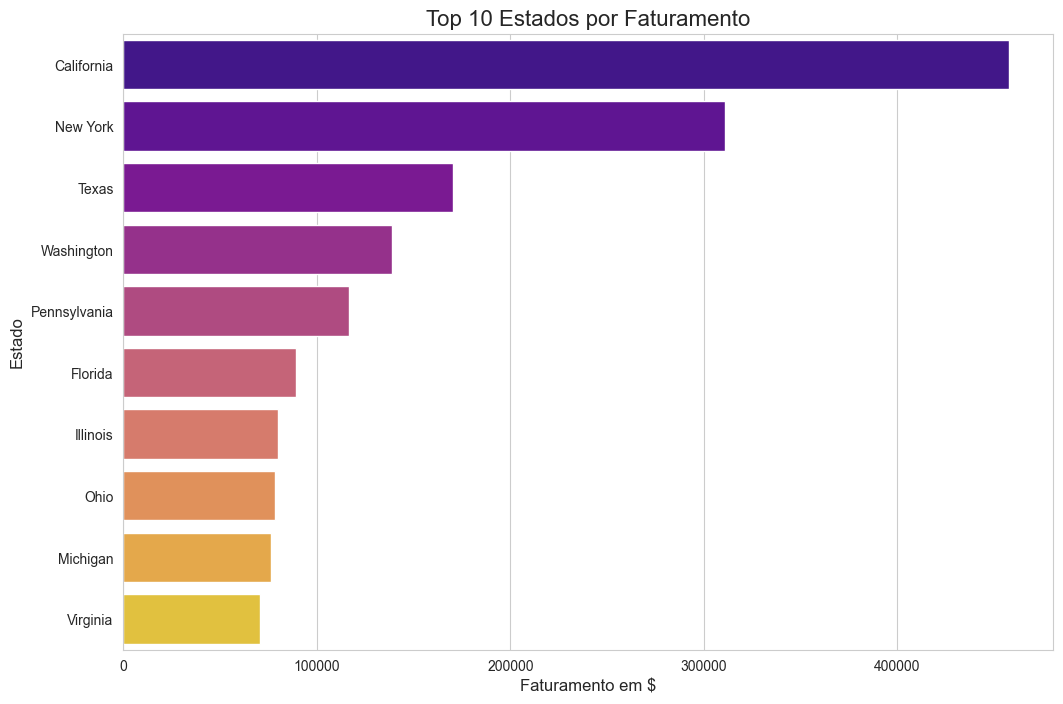

In [40]:
plt.figure(figsize=(12,8))
sns.barplot(x='Sales', y='State', data=top10_states, palette='plasma', orient='h')

plt.title('Top 10 Estados por Faturamento', fontsize=16)
plt.xlabel('Faturamento em $', fontsize=12)
plt.ylabel('Estado', fontsize=12)

plt.show()